In [1]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
analysis = scripts.Analysis()

In [3]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'n2o',
                          'band07_wn_1215_1380',
                          'P_50_T_250',
                          'min_4e-21_max_1e-17_ng_4',
                          'wgt_1_.8_.7_.6',
                          'subarctic_winter')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [4]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'n2o',
                               'band07_wn_1215_1380',
                               'P_50_T_250',
                               'min_4e-21_max_1e-17_ng_4',
                               'wgt_1_.8_.7_.6',
                               'subarctic_winter')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [5]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4,]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [6]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [7]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [8]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [9]:
fig.display_hrefanchor()

In [10]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [11]:
table_dgdgs.display_hrefanchor()

In [12]:
for g in [1, 2, 3, 4,]:
    s = 'Table: flux. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

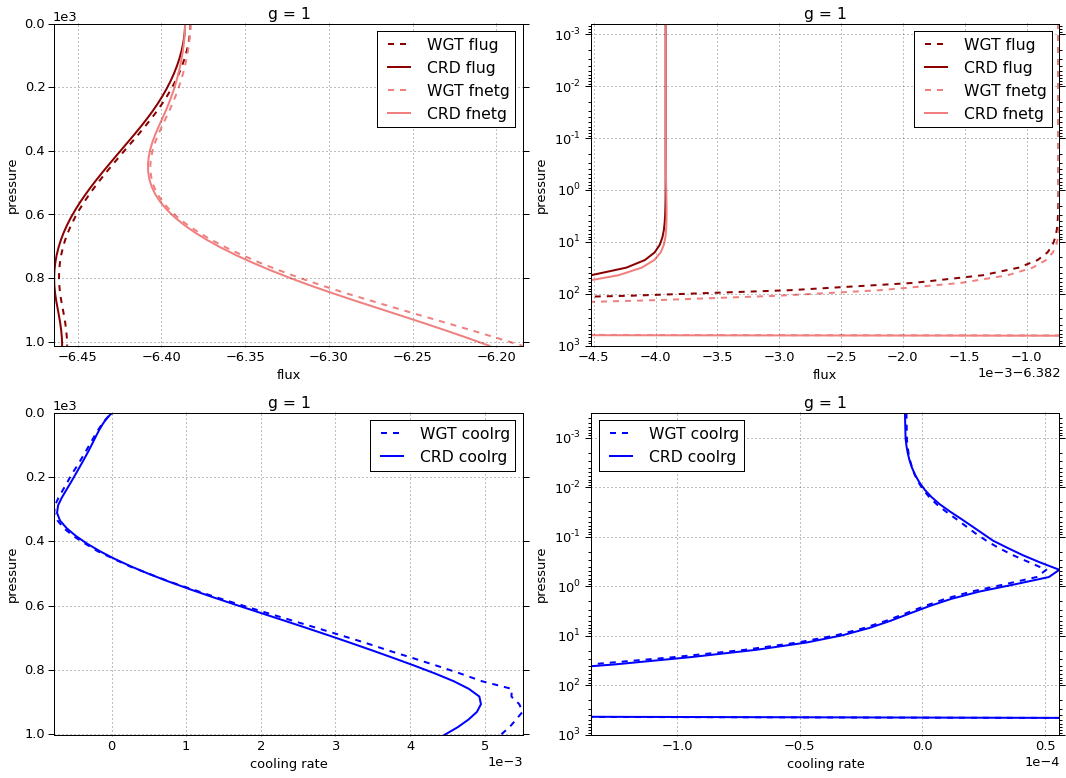

# Figure: flux, cooling rate. g-group 2

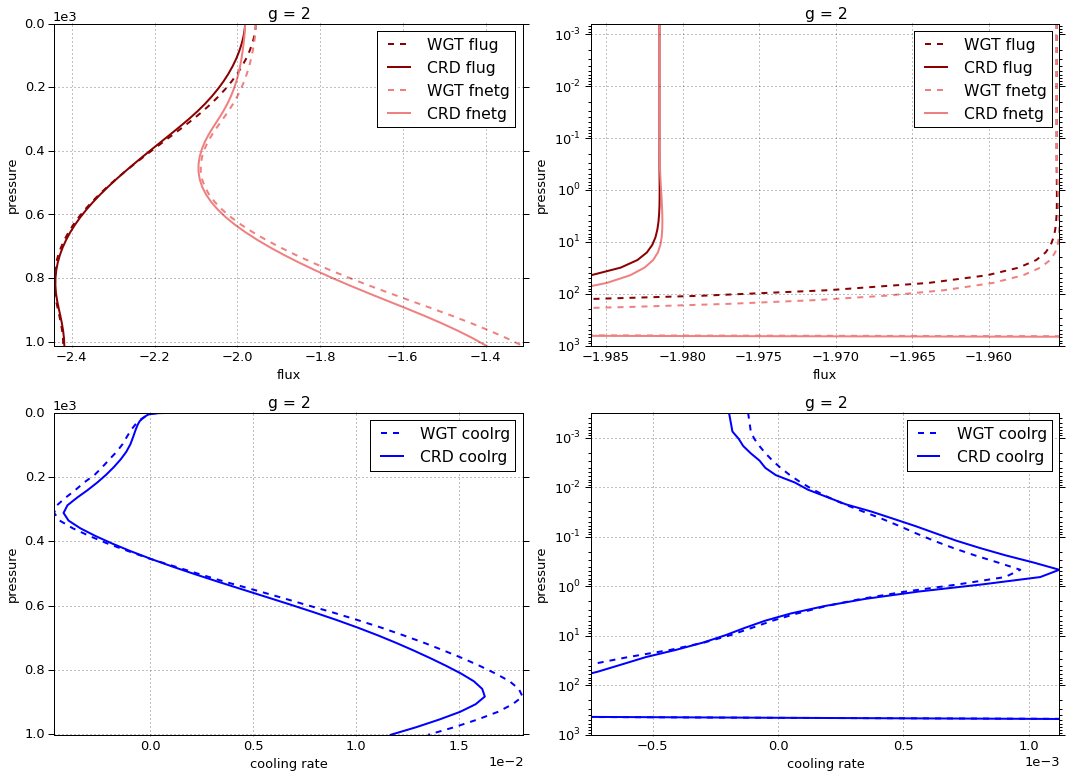

# Figure: flux, cooling rate. g-group 3

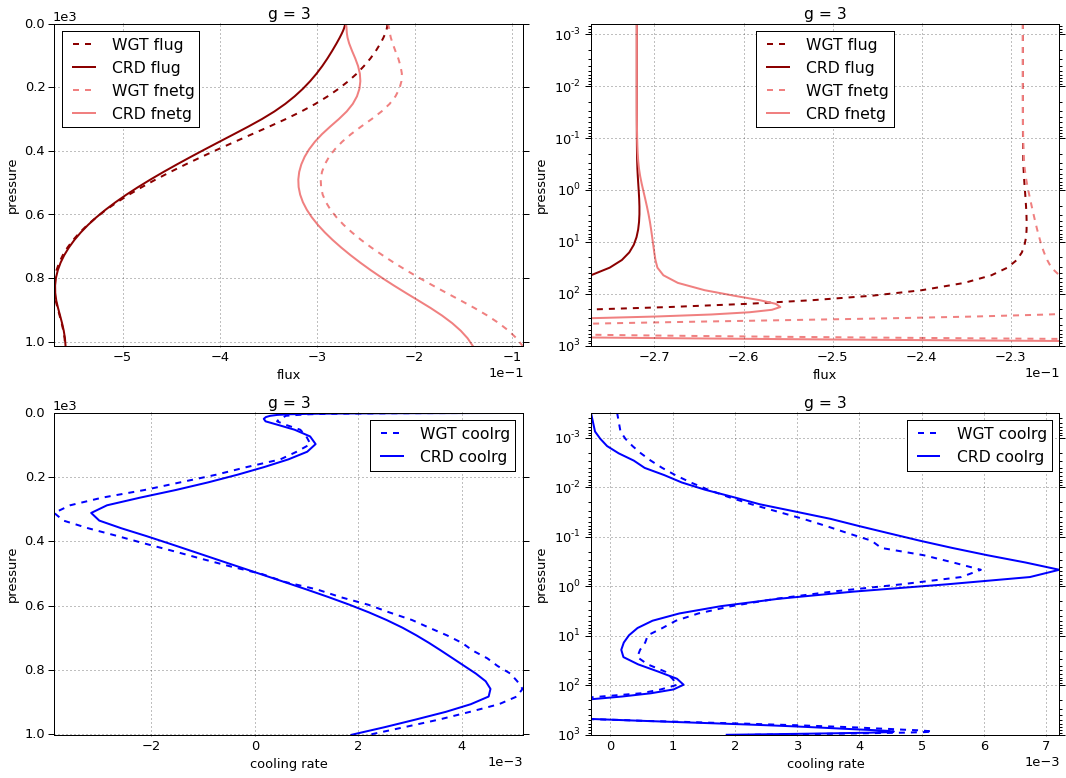

# Figure: flux, cooling rate. g-group 4

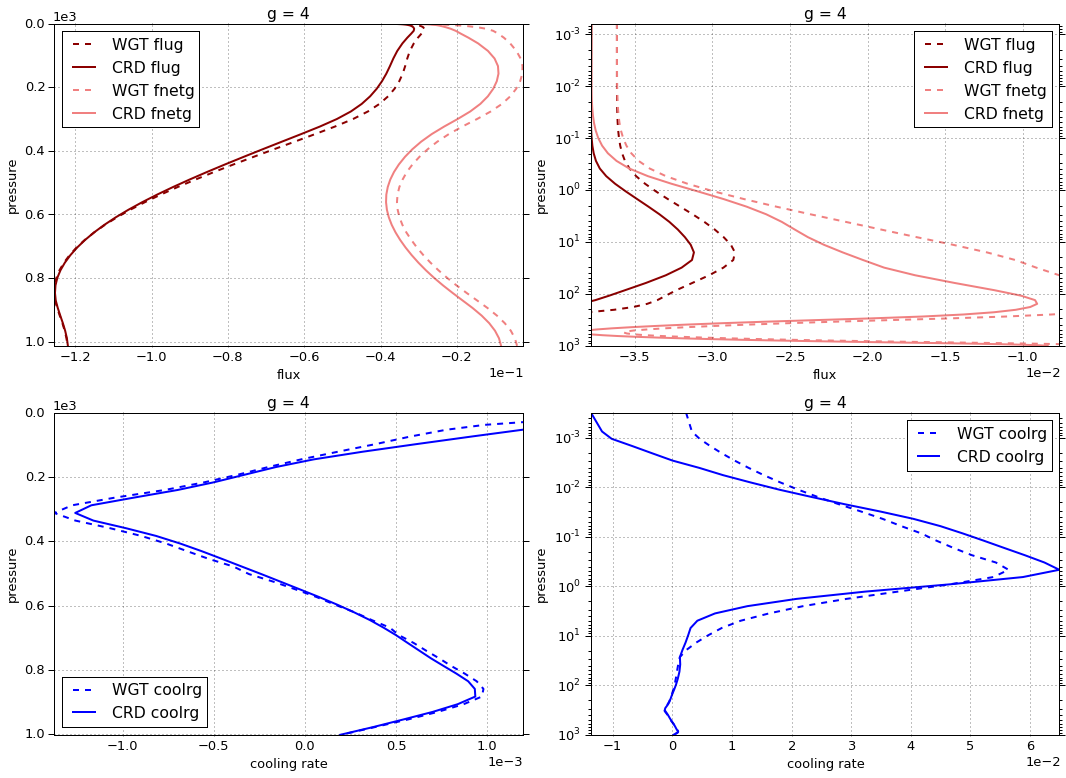

# Figure: flux, cooling rate. g-group total

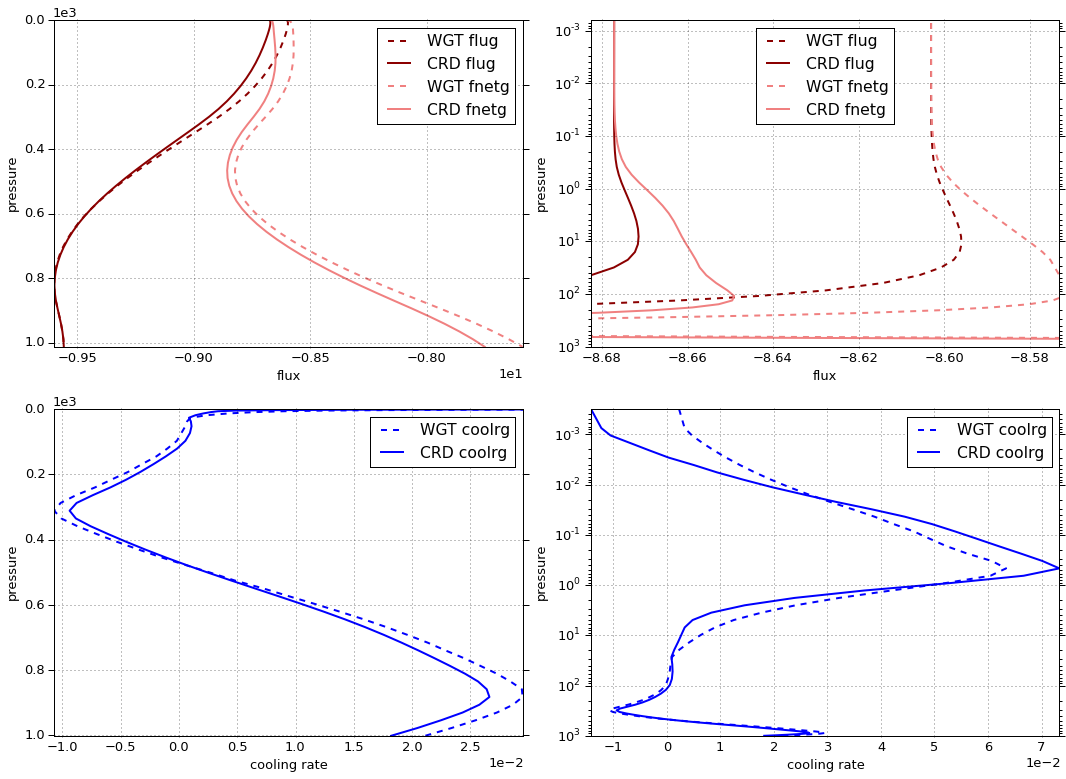

In [14]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [15]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg     fnetg
g pressure level                              
1 0        1     -6.385919  0.000000 -6.385919
  1013     76    -6.459300  0.255123 -6.204177
2 0        1     -1.981512  0.000000 -1.981512
  1013     76    -2.417954  1.019515 -1.398439
3 0        1     -0.271978  0.000000 -0.271978
  1013     76    -0.558797  0.418388 -0.140409
4 0        1     -0.037790  0.000000 -0.037790
  1013     76    -0.121976  0.113571 -0.008405


WGT


flug      fldg     fnetg
g pressure level                              
1 0        1     -6.382744  0.000000 -6.382744
  1013     76    -6.456327  0.271910 -6.184417
2 0        1     -1.955586  0.000000 -1.955586
  1013     76    -2.420405  1.109176 -1.311229
3 0        1     -0.228639  0.000000 -0.228639
  1013     76    -0.559207  0.469996 -0.089211
4 0        1     -0.036146  0.000000 -0.036146
  1013     76    -0.122087  0.117873 -0.004214


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1      0.003175  0.000000  0.003175
  1013     76     0.002973  0.016787  0.019760
2 0        1      0.025925  0.000000  0.025925
  1013     76    -0.002452  0.089662  0.087210
3 0        1      0.043339  0.000000  0.043339
  1013     76    -0.000410  0.051607  0.051197
4 0        1      0.001644  0.000000  0.001644
  1013     76    -0.000111  0.004302  0.004190

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000007
  1001.112500 75     0.004464
2 0.000312    1     -0.000196
  1001.112500 75     0.011668
3 0.000312    1     -0.000314
  1001.112500 75     0.001867
4 0.000312    1     -0.013653
  1001.112500 75     0.000194


WGT


coolrg
g pressure    layer          
1 0.000312    1     -0.000006
  1001.112500 75     0.005216
2 0.000312    1     -0.000120
  1001.112500 75     0.013490
3 0.000312    1      0.000106
  1001.112500 75     0.002207
4 0.000312    1      0.002304
  1001.112500 75     0.000200


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1      6.071082e-07
  1001.112500 75     7.513989e-04
2 0.000312    1      7.629859e-05
  1001.112500 75     1.821526e-03
3 0.000312    1      4.200288e-04
  1001.112500 75     3.401064e-04
4 0.000312    1      1.595732e-02
  1001.112500 75     5.410700e-06

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-8.677199,0.000000,-8.677199
1013,76,-9.558027,1.806598,-7.751429



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-8.603115,0.000000,-8.603115
1013,76,-9.558027,1.968955,-7.589072



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,7.408406e-02,0.000000,0.074084
1013,76,2.000000e-08,0.162357,0.162357


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.014170
1001.112500,75,0.018194



WGT


,,coolrg
pressure,layer,
0.000312,1,0.002284
1001.112500,75,0.021113



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.016454
1001.112500,75,0.002918


In [16]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.686000,0.675487
2,0.244758,0.253233
3,0.056879,0.058507
4,0.012364,0.012773


In [17]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 1

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      1     1 -6.382744  0.000000e+00 -6.382744   1     1 -6.385919   
0.000624      1     2 -6.382744  1.811175e-10 -6.382744   1     2 -6.385919   
0.000876      1     3 -6.382744  2.619532e-10 -6.382744   1     3 -6.385919   
0.001229      1     4 -6.382744  3.941650e-10 -6.382744   1     4 -6.385919   
0.001723      1     5 -6.382744  6.156713e-10 -6.382744   1     5 -6.385919   
0.002417      1     6 -6.382744  9.868653e-10 -6.382744   1     6 -6.385919   
0.003391      1     7 -6.382744  1.609008e-09 -6.382744   1     7 -6.385919   
0.004757      1     8 -6.382744  2.651615e-09 -6.382744   1     8 -6.385919   
0.006672      1     9 -6.382744  4.398052e-09 -6.382744   1     9 -6.385919   
0.009359      1    10 -6.382744  7.323576e-09 -6.382744   1    10 -6.385919   
0.013128      1    11 -6.382744  1.222433e-08 -6.382744   1    11 -6.385919   
0.018415      1    12 -6.382744  2.043446e-08 -6.382744   1    12 -6.385919   
0.025830      1    13 -6.382744  3.418829e-08 -6.382744   1    13 -6.385919   
0.036232      1    14 -6.382744  5.716303e-08 -6.382744   1    14 -6.385919   
0.050823      1    15 -6.382744  9.482512e-08 -6.382744   1    15 -6.385919   
0.071291      1    16 -6.382744  1.547382e-07 -6.382744   1    16 -6.385919   
0.100000      1    17 -6.382744  2.485353e-07 -6.382744   1    17 -6.385919   
0.140271      1    18 -6.382744  3.951899e-07 -6.382744   1    18 -6.385919   
0.196760      1    19 -6.382744  6.249538e-07 -6.382743   1    19 -6.385919   
0.275997      1    20 -6.382744  9.859650e-07 -6.382743   1    20 -6.385919   
0.387100      1    21 -6.382744  1.554515e-06 -6.382742   1    21 -6.385919   
0.543100      1    22 -6.382744  2.443185e-06 -6.382741   1    22 -6.385919   
0.761700      1    23 -6.382744  3.637848e-06 -6.382740   1    23 -6.385919   
1.068500      1    24 -6.382744  5.017604e-06 -6.382739   1    24 -6.385919   
1.498800      1    25 -6.382745  6.528878e-06 -6.382738   1    25 -6.385920   
2.102400      1    26 -6.382746  8.231898e-06 -6.382737   1    26 -6.385921   
2.949000      1    27 -6.382747  1.024805e-05 -6.382737   1    27 -6.385923   
4.136600      1    28 -6.382751  1.278120e-05 -6.382738   1    28 -6.385926   
5.802500      1    29 -6.382757  1.624125e-05 -6.382741   1    29 -6.385933   
8.139200      1    30 -6.382769  2.143905e-05 -6.382748   1    30 -6.385944   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    1    47 -6.409874  1.006888e-02 -6.399805   1    47 -6.412327   
347.300000    1    48 -6.413622  1.177729e-02 -6.401845   1    48 -6.416033   
371.075000    1    49 -6.417467  1.382209e-02 -6.403645   1    49 -6.419826   
394.850000    1    50 -6.421351  1.625105e-02 -6.405100   1    50 -6.423662   
418.625000    1    51 -6.425206  1.910215e-02 -6.406103   1    51 -6.427501   
442.400000    1    52 -6.429045  2.241273e-02 -6.406633   1    52 -6.431307   
466.175000    1    53 -6.432776  2.621938e-02 -6.406556   1    53 -6.435042   
489.950000    1    54 -6.436418  3.055732e-02 -6.405861   1    54 -6.438669   
513.725000    1    55 -6.439872  3.545958e-02 -6.404412   1    55 -6.442151   
537.500000    1    56 -6.443169  4.095594e-02 -6.402213   1    56 -6.445455   
561.275000    1    57 -6.446225  4.707178e-02 -6.399154   1    57 -6.448548   
585.050000    1    58 -6.449052  5.382689e-02 -6.395225   1    58 -6.451402   
608.825000    1    59 -6.451607  6.123451e-02 -6.390372   1    59 -6.453994   
632.600000    1    60 -6.453875  6.930086e-02 -6.384574   1    60 -6.456307   
656.375000    1    61 -6.455844  7.802524e-02 -6.377818   1    61 -6.458329   
680.150000    1    62 -6.457504  8.739992e-02 -6.370104   1    62 -6.460052   
703.925000    1    63 -6.458856  9.741479e-02 -6.361441   1   

In [18]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 2

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      2     1 -1.955586  0.000000e+00 -1.955586   2     1 -1.981512   
0.000624      2     2 -1.955586  6.268363e-09 -1.955586   2     2 -1.981512   
0.000876      2     3 -1.955586  9.000800e-09 -1.955586   2     3 -1.981512   
0.001229      2     4 -1.955586  1.326223e-08 -1.955586   2     4 -1.981512   
0.001723      2     5 -1.955586  2.006520e-08 -1.955586   2     5 -1.981512   
0.002417      2     6 -1.955586  3.092760e-08 -1.955586   2     6 -1.981512   
0.003391      2     7 -1.955586  4.827493e-08 -1.955586   2     7 -1.981512   
0.004757      2     8 -1.955586  7.597684e-08 -1.955586   2     8 -1.981512   
0.006672      2     9 -1.955586  1.201983e-07 -1.955586   2     9 -1.981512   
0.009359      2    10 -1.955586  1.908035e-07 -1.955586   2    10 -1.981512   
0.013128      2    11 -1.955586  3.035549e-07 -1.955586   2    11 -1.981512   
0.018415      2    12 -1.955586  4.836562e-07 -1.955586   2    12 -1.981512   
0.025830      2    13 -1.955587  7.713870e-07 -1.955586   2    13 -1.981512   
0.036232      2    14 -1.955587  1.229934e-06 -1.955585   2    14 -1.981512   
0.050823      2    15 -1.955587  1.950967e-06 -1.955585   2    15 -1.981513   
0.071291      2    16 -1.955587  3.061165e-06 -1.955583   2    16 -1.981513   
0.100000      2    17 -1.955586  4.749813e-06 -1.955581   2    17 -1.981513   
0.140271      2    18 -1.955586  7.313735e-06 -1.955579   2    18 -1.981512   
0.196760      2    19 -1.955585  1.121122e-05 -1.955574   2    19 -1.981512   
0.275997      2    20 -1.955584  1.714623e-05 -1.955567   2    20 -1.981511   
0.387100      2    21 -1.955581  2.619133e-05 -1.955555   2    21 -1.981509   
0.543100      2    22 -1.955577  3.987774e-05 -1.955537   2    22 -1.981505   
0.761700      2    23 -1.955572  5.828975e-05 -1.955514   2    23 -1.981501   
1.068500      2    24 -1.955568  8.043338e-05 -1.955488   2    24 -1.981499   
1.498800      2    25 -1.955567  1.056552e-04 -1.955462   2    25 -1.981501   
2.102400      2    26 -1.955573  1.345676e-04 -1.955438   2    26 -1.981512   
2.949000      2    27 -1.955587  1.685131e-04 -1.955419   2    27 -1.981534   
4.136600      2    28 -1.955618  2.097770e-04 -1.955408   2    28 -1.981576   
5.802500      2    29 -1.955676  2.630568e-04 -1.955413   2    29 -1.981647   
8.139200      2    30 -1.955780  3.375898e-04 -1.955442   2    30 -1.981769   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    2    47 -2.129778  8.173211e-02 -2.048045   2    47 -2.138711   
347.300000    2    48 -2.153949  9.349748e-02 -2.060452   2    48 -2.161151   
371.075000    2    49 -2.178307  1.072213e-01 -2.071086   2    49 -2.183862   
394.850000    2    50 -2.202538  1.230667e-01 -2.079471   2    50 -2.206549   
418.625000    2    51 -2.226437  1.410938e-01 -2.085343   2    51 -2.229010   
442.400000    2    52 -2.249754  1.614024e-01 -2.088352   2    52 -2.251059   
466.175000    2    53 -2.272368  1.839715e-01 -2.088397   2    53 -2.272510   
489.950000    2    54 -2.294076  2.090083e-01 -2.085068   2    54 -2.293183   
513.725000    2    55 -2.314665  2.363108e-01 -2.078354   2    55 -2.312906   
537.500000    2    56 -2.334011  2.658660e-01 -2.068145   2    56 -2.331520   
561.275000    2    57 -2.351973  2.978159e-01 -2.054157   2    57 -2.348881   
585.050000    2    58 -2.368431  3.319453e-01 -2.036486   2    58 -2.364872   
608.825000    2    59 -2.383300  3.680646e-01 -2.015236   2    59 -2.379400   
632.600000    2    60 -2.396517  4.062064e-01 -1.990311   2    60 -2.392405   
656.375000    2    61 -2.408054  4.460776e-01 -1.961976   2    61 -2.403851   
680.150000    2    62 -2.417943  4.875705e-01 -1.930373   2    62 -2.413722   
703.925000    2    63 -2.426158  5.304037e-01 -1.895754   2   

In [19]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 3

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      3     1 -0.228639  0.000000e+00 -0.228639   3     1 -0.271978   
0.000624      3     2 -0.228639  2.673303e-08 -0.228639   3     2 -0.271978   
0.000876      3     3 -0.228639  3.851511e-08 -0.228639   3     3 -0.271978   
0.001229      3     4 -0.228639  5.728110e-08 -0.228639   3     4 -0.271978   
0.001723      3     5 -0.228639  8.783082e-08 -0.228639   3     5 -0.271978   
0.002417      3     6 -0.228639  1.374871e-07 -0.228639   3     6 -0.271978   
0.003391      3     7 -0.228639  2.180728e-07 -0.228639   3     7 -0.271978   
0.004757      3     8 -0.228639  3.486119e-07 -0.228639   3     8 -0.271979   
0.006672      3     9 -0.228639  5.596179e-07 -0.228638   3     9 -0.271979   
0.009359      3    10 -0.228639  9.001462e-07 -0.228638   3    10 -0.271979   
0.013128      3    11 -0.228639  1.448823e-06 -0.228637   3    11 -0.271979   
0.018415      3    12 -0.228638  2.331527e-06 -0.228636   3    12 -0.271979   
0.025830      3    13 -0.228638  3.749335e-06 -0.228634   3    13 -0.271979   
0.036232      3    14 -0.228637  6.016979e-06 -0.228631   3    14 -0.271978   
0.050823      3    15 -0.228635  9.588643e-06 -0.228625   3    15 -0.271977   
0.071291      3    16 -0.228632  1.508907e-05 -0.228617   3    16 -0.271975   
0.100000      3    17 -0.228627  2.344934e-05 -0.228604   3    17 -0.271971   
0.140271      3    18 -0.228620  3.612320e-05 -0.228584   3    18 -0.271965   
0.196760      3    19 -0.228610  5.534108e-05 -0.228555   3    19 -0.271955   
0.275997      3    20 -0.228592  8.450139e-05 -0.228508   3    20 -0.271939   
0.387100      3    21 -0.228564  1.287282e-04 -0.228435   3    21 -0.271912   
0.543100      3    22 -0.228520  1.952410e-04 -0.228325   3    22 -0.271869   
0.761700      3    23 -0.228464  2.843329e-04 -0.228179   3    23 -0.271814   
1.068500      3    24 -0.228400  3.909368e-04 -0.228010   3    24 -0.271757   
1.498800      3    25 -0.228339  5.106606e-04 -0.227828   3    25 -0.271711   
2.102400      3    26 -0.228283  6.444518e-04 -0.227639   3    26 -0.271683   
2.949000      3    27 -0.228240  7.958128e-04 -0.227444   3    27 -0.271684   
4.136600      3    28 -0.228217  9.712443e-04 -0.227245   3    28 -0.271726   
5.802500      3    29 -0.228224  1.186189e-03 -0.227038   3    29 -0.271826   
8.139200      3    30 -0.228279  1.471964e-03 -0.226807   3    30 -0.272008   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    3    47 -0.349419  9.438653e-02 -0.255033   3    47 -0.370930   
347.300000    3    48 -0.367043  1.016019e-01 -0.265441   3    48 -0.385679   
371.075000    3    49 -0.384651  1.101444e-01 -0.274507   3    49 -0.400583   
394.850000    3    50 -0.401959  1.199528e-01 -0.282006   3    50 -0.415391   
418.625000    3    51 -0.418893  1.309001e-01 -0.287993   3    51 -0.429989   
442.400000    3    52 -0.435280  1.428754e-01 -0.292404   3    52 -0.444268   
466.175000    3    53 -0.451042  1.557479e-01 -0.295294   3    53 -0.458124   
489.950000    3    54 -0.466061  1.694599e-01 -0.296601   3    54 -0.471457   
513.725000    3    55 -0.480239  1.840446e-01 -0.296194   3    55 -0.484164   
537.500000    3    56 -0.493496  1.989030e-01 -0.294593   3    56 -0.496154   
561.275000    3    57 -0.505766  2.145582e-01 -0.291207   3    57 -0.507347   
585.050000    3    58 -0.516984  2.304329e-01 -0.286551   3    58 -0.517676   
608.825000    3    59 -0.527122  2.467458e-01 -0.280376   3    59 -0.527092   
632.600000    3    60 -0.536162  2.631050e-01 -0.273057   3    60 -0.535571   
656.375000    3    61 -0.544108  2.796058e-01 -0.264502   3    61 -0.543103   
680.150000    3    62 -0.550973  2.959546e-01 -0.255019   3    62 -0.549690   
703.925000    3    63 -0.556786  3.122195e-01 -0.244567   3   

In [20]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 4

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      4     1 -0.036146  0.000000e+00 -0.036146   4     1 -0.037790   
0.000624      4     2 -0.036146  5.134455e-07 -0.036146   4     2 -0.037792   
0.000876      4     3 -0.036146  7.348202e-07 -0.036146   4     3 -0.037793   
0.001229      4     4 -0.036147  1.072357e-06 -0.036146   4     4 -0.037794   
0.001723      4     5 -0.036147  1.598148e-06 -0.036145   4     5 -0.037795   
0.002417      4     6 -0.036147  2.416187e-06 -0.036144   4     6 -0.037797   
0.003391      4     7 -0.036147  3.687321e-06 -0.036143   4     7 -0.037799   
0.004757      4     8 -0.036147  5.659520e-06 -0.036141   4     8 -0.037802   
0.006672      4     9 -0.036146  8.713871e-06 -0.036138   4     9 -0.037805   
0.009359      4    10 -0.036145  1.343806e-05 -0.036132   4    10 -0.037808   
0.013128      4    11 -0.036143  2.073543e-05 -0.036123   4    11 -0.037813   
0.018415      4    12 -0.036139  3.199328e-05 -0.036107   4    12 -0.037817   
0.025830      4    13 -0.036132  4.933715e-05 -0.036083   4    13 -0.037820   
0.036232      4    14 -0.036120  7.595304e-05 -0.036044   4    14 -0.037820   
0.050823      4    15 -0.036099  1.163651e-04 -0.035983   4    15 -0.037815   
0.071291      4    16 -0.036066  1.768310e-04 -0.035890   4    16 -0.037802   
0.100000      4    17 -0.036014  2.664051e-04 -0.035747   4    17 -0.037776   
0.140271      4    18 -0.035935  3.986595e-04 -0.035536   4    18 -0.037728   
0.196760      4    19 -0.035814  5.937490e-04 -0.035220   4    19 -0.037644   
0.275997      4    20 -0.035630  8.812293e-04 -0.034749   4    20 -0.037497   
0.387100      4    21 -0.035338  1.303629e-03 -0.034034   4    21 -0.037249   
0.543100      4    22 -0.034910  1.918058e-03 -0.032992   4    22 -0.036835   
0.761700      4    23 -0.034332  2.735314e-03 -0.031597   4    23 -0.036263   
1.068500      4    24 -0.033636  3.732049e-03 -0.029904   4    24 -0.035577   
1.498800      4    25 -0.032872  4.896181e-03 -0.027975   4    25 -0.034849   
2.102400      4    26 -0.032071  6.185151e-03 -0.025886   4    26 -0.034117   
2.949000      4    27 -0.031271  7.584619e-03 -0.023687   4    27 -0.033409   
4.136600      4    28 -0.030516  9.110331e-03 -0.021406   4    28 -0.032768   
5.802500      4    29 -0.029849  1.070828e-02 -0.019141   4    29 -0.032226   
8.139200      4    30 -0.029272  1.242653e-02 -0.016846   4    30 -0.031770   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    4    47 -0.051963  3.339403e-02 -0.018569   4    47 -0.055917   
347.300000    4    48 -0.057175  3.505928e-02 -0.022116   4    48 -0.060842   
371.075000    4    49 -0.062527  3.740268e-02 -0.025124   4    49 -0.065886   
394.850000    4    50 -0.067934  4.027813e-02 -0.027656   4    50 -0.070909   
418.625000    4    51 -0.073260  4.345976e-02 -0.029800   4    51 -0.075870   
442.400000    4    52 -0.078508  4.688923e-02 -0.031619   4    52 -0.080735   
466.175000    4    53 -0.083607  5.049993e-02 -0.033107   4    53 -0.085471   
489.950000    4    54 -0.088481  5.426776e-02 -0.034213   4    54 -0.090042   
513.725000    4    55 -0.093205  5.813027e-02 -0.035075   4    55 -0.094422   
537.500000    4    56 -0.097627  6.207100e-02 -0.035556   4    56 -0.098580   
561.275000    4    57 -0.101776  6.607828e-02 -0.035698   4    57 -0.102481   
585.050000    4    58 -0.105608  7.009327e-02 -0.035515   4    58 -0.106097   
608.825000    4    59 -0.109108  7.405971e-02 -0.035049   4    59 -0.109414   
632.600000    4    60 -0.112269  7.799295e-02 -0.034276   4    60 -0.112419   
656.375000    4    61 -0.115089  8.184704e-02 -0.033242   4    61 -0.115108   
680.150000    4    62 -0.117566  8.563732e-02 -0.031929   4    62 -0.117483   
703.925000    4    63 -0.119710  8.924061e-02 -0.030470   4   

In [21]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')